# Predicting Amazon's Stock Price with Added Regularization

In this activity, we will examine the stock price of Amazon over the last 5 years, from January 1, 2014, to December 31, 2018. In doing so, we will try to predict and forecast the company's future trend for January 2019 using RNNs and an LSTM. We have the actual values for January 2019, so we will be able to compare our predictions with the actual values later. Initially, we predicted the trend of Amazon's stock price using an LSTM with 50 units (or neurons). Here, we will also add dropout regularization and compare the results with *Activity 9.01, Predicting the Trend of Amazon's Stock Price Using an LSTM with 50 Units (Neurons)*. Follow these steps to complete this activity:

### 1. Import the required libraries.

In [1]:
import numpy as np
import pandas as pd 
from tensorflow import random
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 

### 2. From the full dataset, extract the Open column since the predictions will be made on the open stock value. You can download the dataset from Packt's GitHub repository.

In [6]:
train_dataset = pd.read_csv('../AMZN_train.csv')
test_dataset = pd.read_csv('../AMZN_test.csv')
train_data, test_data = train_dataset[['Open']].values, test_dataset[['Open']].values
train_data.shape

(1258, 1)

### 3. Normalize the data between 0 and 1.

In [8]:
scaler = MinMaxScaler()
scaler.fit(train_data)

train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

### 4. Then, create timestamps. The values of each day in January 2019 will be predicted by the previous 60 days. So, if January 1 is predicted by using the value from the nth day up to December 31, then January 2 will be predicted by using the n + 1st day and January 1, and so on.

### 5. Reshape the data into three dimensions since the network needs the data to be in three dimensions.

In [12]:
X_train = []
y_train = []

for i in range(60, train_scaled.shape[0]):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

### 7. Process and prepare the test data, which is the actual data for January 2019.

In [18]:
combined_data = pd.concat((train_dataset['Open'], test_dataset['Open']), axis=0)
inputs = combined_data[len(combined_data) - len(test_data) - 60:].values
inputs = np.reshape(inputs, (-1,1))

inputs = scaler.transform(inputs)

inputs.shape

(81, 1)

In [25]:
X_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(21, 60, 1)

### 6. Build an RNN with four LSTM layers in Keras, each with 50 units (here, units refer to neurons), and a 20% dropout after each LSTM layer. The first step should provide the input shape. Note that the final LSTM layer always adds return_sequences=True.

In [20]:
SEED = 1
np.random.seed(SEED)
random.set_seed(SEED)

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    verbose=1
)

Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0261
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0034
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0027
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0040
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0029
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0029
Epoch 7/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0025
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0032
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0028
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0025
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0026
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

In [22]:
model.save('saved_model')

In [26]:
y_pred = model.predict(X_test)
predicted = scaler.inverse_transform(y_pred)
predicted

array([[1480.3591],
       [1495.1705],
       [1512.8134],
       [1530.4912],
       [1552.1384],
       [1581.4191],
       [1611.8342],
       [1635.368 ],
       [1649.0518],
       [1651.5365],
       [1648.1356],
       [1648.3617],
       [1653.4587],
       [1664.7013],
       [1675.7347],
       [1680.8994],
       [1678.9167],
       [1675.6578],
       [1671.2781],
       [1665.6382],
       [1659.1486]], dtype=float32)

### 9. Visualize results.

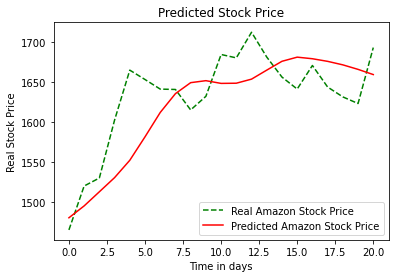

In [29]:
plt.plot(test_data, label='Real Amazon Stock Price', color='green', ls='--')
plt.plot(predicted, label='Predicted Amazon Stock Price', color='red', ls='-')

plt.title('Predicted Stock Price')
plt.legend()
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')

plt.show()

Here, you can see that adding dropout regularization is giving us a worse trend. So, in our case, it is better to not use regularization